In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
sessions = pd.read_csv('sessions.csv')
sessions = sessions.fillna(0)

# reformat dates
sessions['date'] = pd.to_datetime(sessions.date)

In [3]:
sessions.columns

Index(['date', 'monkey', 'cycle', 'phase', 'location', 'kg', 'mood', 'rm',
       'stable', 'max_full', 'total', 'total6', '4', '5a', '5b', '5c', '6a',
       '6a+', '6b', '6b+', '6c', '6c+', '7a', '7a+', '7b', '7b+', '7c', '7c+',
       '8a'],
      dtype='object')

In [4]:
sessions.head()

,date,monkey,cycle,phase,location,kg,mood,rm,stable,max_full,...,6b+,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a
0,2018-03-25,doripa,1,marathon,bb1,78.0,0.0,9.0,6a,6b+,...,4.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-03-25,sunshine,1,marathon,bb1,60.0,0.0,9.0,5c,6b+,...,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-03-27,doripa,1,technique,bf,78.0,0.0,6.0,6b,6b+,...,2.0,0.25,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0
3,2018-03-29,doripa,1,4x4,bb2,78.0,0.0,5.0,6b,6b,...,0.0,0.00,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-03-29,sunshine,1,4x4,bb2,60.0,0.0,5.0,5c,6a+,...,0.0,0.00,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
scores_translator = {
    '4': 4,
    '5a': 8,
    '5b': 9,
    '5c': 10,
    '6a': 20,
    '6a+': 21,
    '6b': 30,
    '6b+': 40,
    '6c': 45,
    '6c+': 50,
    '7a': 80,
    '7a+': 90,
}

def calc_score(row):
    s = [row[key] * scores_translator[key] for key in scores_translator]
    return sum(s)



In [6]:
scores = sessions.apply(calc_score, axis=1)
sessions['scores'] = scores
sessions

,date,monkey,cycle,phase,location,kg,mood,rm,stable,max_full,...,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a,scores
0,2018-03-25,doripa,1,marathon,bb1,78.0,0.0,9.0,6a,6b+,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1012.00
1,2018-03-25,sunshine,1,marathon,bb1,60.0,0.0,9.0,5c,6b+,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,556.00
2,2018-03-27,doripa,1,technique,bf,78.0,0.0,6.0,6b,6b+,...,0.25,0.00,0.0,1.5,0.0,0.0,0.0,0.0,0.0,508.25
3,2018-03-29,doripa,1,4x4,bb2,78.0,0.0,5.0,6b,6b,...,0.00,0.50,0.5,0.0,0.0,0.0,0.0,0.0,0.0,430.00
4,2018-03-29,sunshine,1,4x4,bb2,60.0,0.0,5.0,5c,6a+,...,0.00,0.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0,184.00
5,2018-03-31,doripa,1,project,bf,78.0,0.0,6.0,6b,6b+,...,0.00,0.25,0.5,0.0,0.0,0.0,0.0,0.0,0.0,619.50
6,2018-02-04,doripa,1,project,bb1,78.0,0.0,4.0,6b,6c+,...,0.00,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,678.50
7,2018-04-04,doripa,1,project,bf,78.0,0.0,4.0,6b,6c,...,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,606.00
8,2018-06-04,doripa,1,arc,bf,78.0,0.0,2.0,5c,5c,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,258.00
9,2018-06-04,doripa,1,project,bb2,78.0,0.0,5.0,6b,6c+,...,5.00,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,984.00


In [7]:
doripa = sessions[sessions.monkey == 'doripa']
sunshine_sessions = sessions[sessions.monkey == 'sunshine']

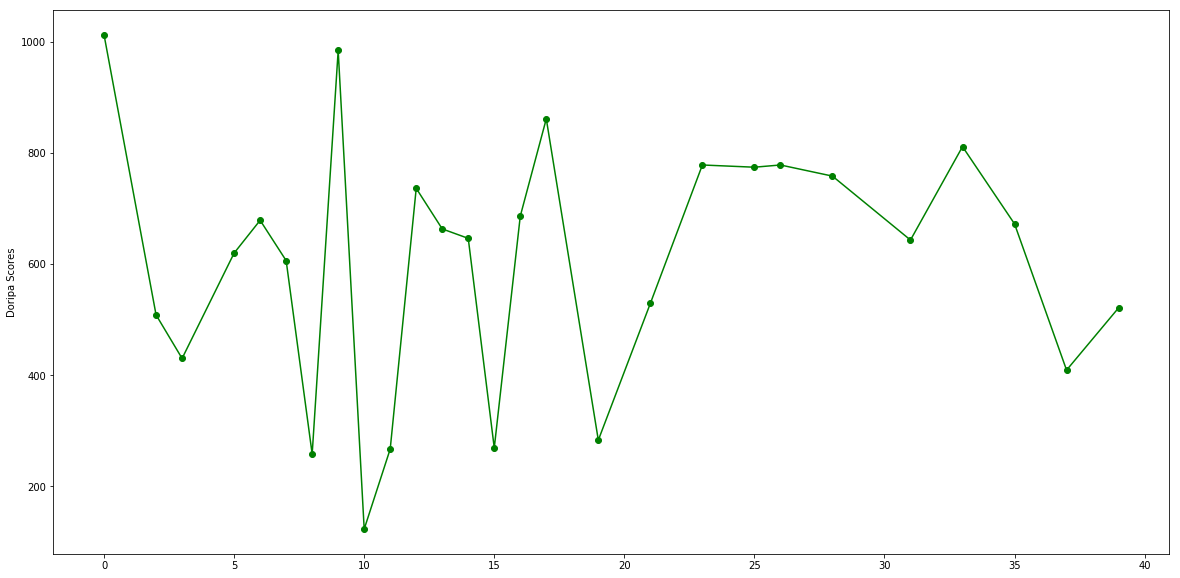

In [8]:
plt.figure(figsize=(20,10))
plt.plot(doripa.scores, marker='o', color='green')
plt.ylabel('Doripa Scores')
plt.show()

In [9]:
sunshine_sessions

,date,monkey,cycle,phase,location,kg,mood,rm,stable,max_full,...,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a,scores
1,2018-03-25,sunshine,1,marathon,bb1,60.0,0.0,9.0,5c,6b+,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,556.0
4,2018-03-29,sunshine,1,4x4,bb2,60.0,0.0,5.0,5c,6a+,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,184.0
18,2018-04-28,sunshine,2,base,bb1,59.0,0.0,6.0,5c,6a+,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.0
20,2018-01-05,sunshine,2,base,bf,59.0,6.0,6.0,5a,5c,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.0
22,2018-03-05,sunshine,2,base,bb2,59.0,7.0,6.0,5c,6a,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0
24,2018-06-05,sunshine,2,base,bb2,59.0,7.0,7.0,5b,6a,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212.0
27,2018-08-05,sunshine,2,base,bb2,59.0,7.0,6.0,5c,6a,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,259.0
29,2018-11-05,sunshine,2,base,bb1,59.0,4.0,7.0,5c,6a,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0
30,2018-05-16,sunshine,2,base,bb2,59.0,3.0,6.0,5c,6a+,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,236.0
32,2018-05-18,sunshine,2,base,bb1,59.0,7.0,7.5,5c,6a+,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,503.0


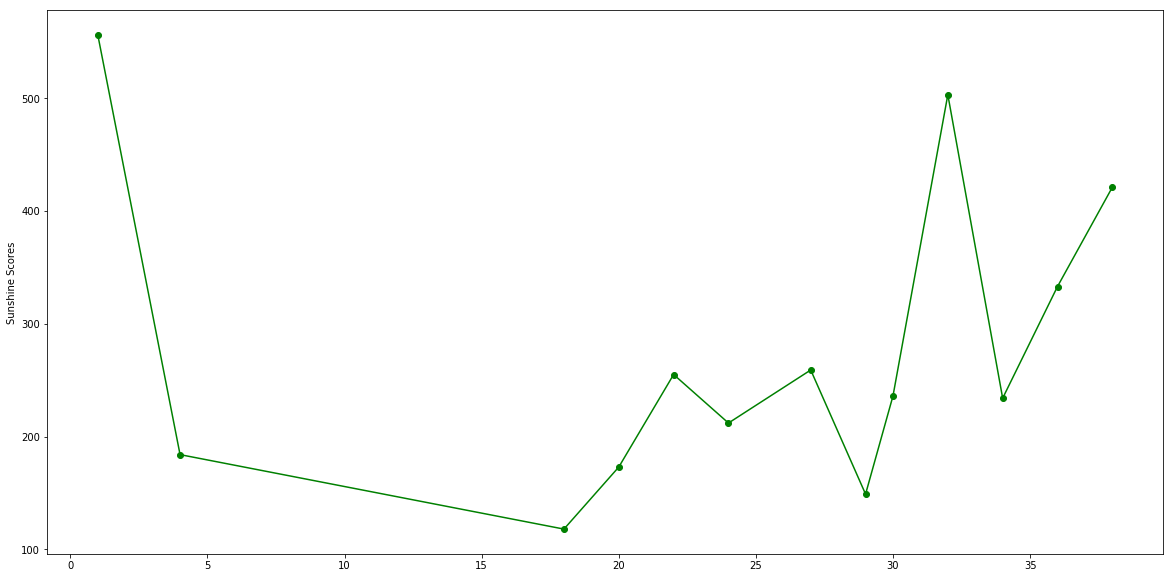

In [10]:
plt.figure(figsize=(20,10))
plt.plot(sunshine_sessions.scores,  marker='o', color='green')
plt.ylabel('Sunshine Scores')
plt.show()

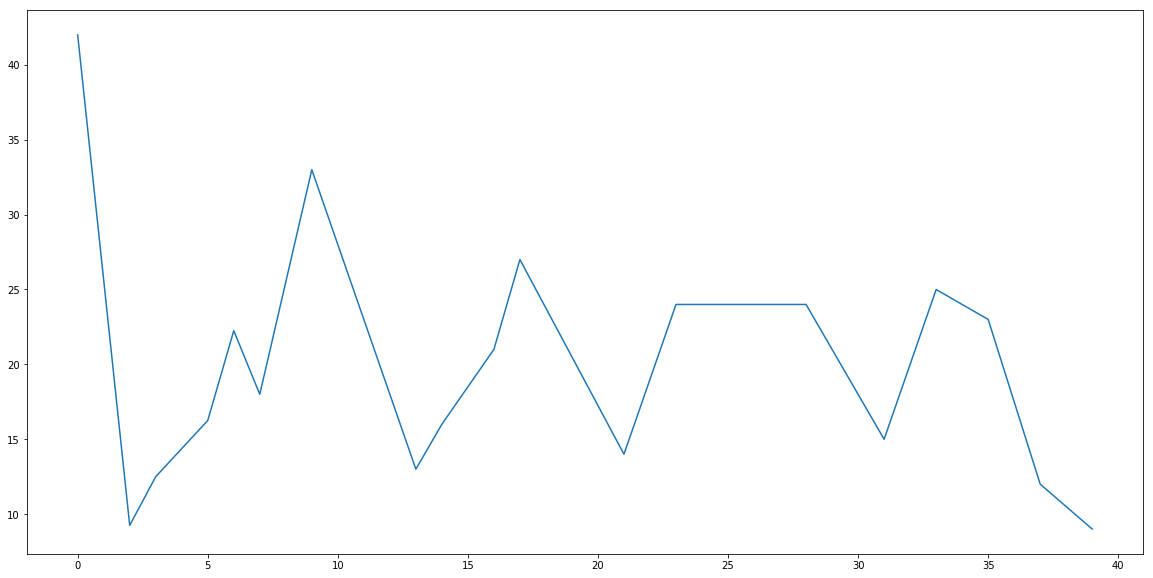

In [11]:
no_arcing = doripa[doripa.phase != 'arc']
plt.figure(figsize=(20,10))
plt.plot(no_arcing['total6'])
plt.show()

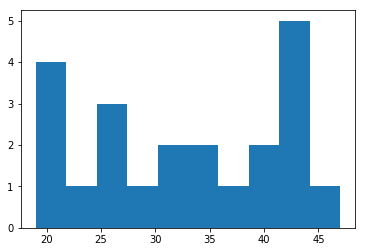

In [12]:
plt.hist(no_arcing['total'])
plt.show()

In [13]:
doripa.corr()

,cycle,kg,mood,rm,total,total6,4,5a,5b,5c,...,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a,scores
cycle,1.000000,-0.672462,0.810521,0.196209,0.418614,0.210674,0.556529,0.142073,-0.032097,0.069365,...,0.308024,-0.285992,-0.291887,-0.135448,NaN,NaN,NaN,NaN,NaN,0.217033
kg,-0.672462,1.000000,-0.828451,-0.426034,-0.446503,-0.187310,-0.822566,-0.264630,0.150373,-0.008375,...,-0.352888,0.357164,0.220554,0.224017,NaN,NaN,NaN,NaN,NaN,-0.189399
mood,0.810521,-0.828451,1.000000,0.271045,0.514217,0.161521,0.755556,0.355472,-0.006504,0.104158,...,0.308004,-0.430491,-0.253390,-0.173874,NaN,NaN,NaN,NaN,NaN,0.190558
rm,0.196209,-0.426034,0.271045,1.000000,0.370533,0.668472,0.384644,-0.321285,-0.554405,-0.540606,...,0.423912,0.158584,0.114787,0.088098,NaN,NaN,NaN,NaN,NaN,0.692405
total,0.418614,-0.446503,0.514217,0.370533,1.000000,0.585881,0.388507,0.464250,0.050553,0.126134,...,0.250731,-0.137473,-0.460249,-0.360937,NaN,NaN,NaN,NaN,NaN,0.592929
total6,0.210674,-0.187310,0.161521,0.668472,0.585881,1.000000,0.092618,-0.360051,-0.666767,-0.626757,...,0.354080,0.290507,-0.033808,-0.157366,NaN,NaN,NaN,NaN,NaN,0.958587
4,0.556529,-0.822566,0.755556,0.384644,0.388507,0.092618,1.000000,0.233028,-0.064275,-0.035846,...,0.365596,-0.295588,-0.170688,-0.185396,NaN,NaN,NaN,NaN,NaN,0.142232
5a,0.142073,-0.264630,0.355472,-0.321285,0.464250,-0.360051,0.233028,1.000000,0.586371,0.675156,...,-0.119355,-0.466970,-0.509492,-0.152275,NaN,NaN,NaN,NaN,NaN,-0.337089
5b,-0.032097,0.150373,-0.006504,-0.554405,0.050553,-0.666767,-0.064275,0.586371,1.000000,0.793081,...,-0.332341,-0.228723,-0.375796,-0.085540,NaN,NaN,NaN,NaN,NaN,-0.639361
5c,0.069365,-0.008375,0.104158,-0.540606,0.126134,-0.626757,-0.035846,0.675156,0.793081,1.000000,...,-0.163857,-0.390229,-0.306542,-0.318639,NaN,NaN,NaN,NaN,NaN,-0.600035


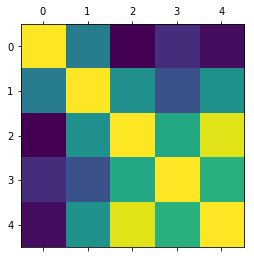

In [14]:
plt.matshow(doripa[['mood', 'total', 'total6', 'rm', 'scores']].corr());

In [15]:
doripa[['mood', 'total', 'total6', 'rm', 'scores']].corr()

,mood,total,total6,rm,scores
mood,1.000000,0.514217,0.161521,0.271045,0.190558
total,0.514217,1.000000,0.585881,0.370533,0.592929
total6,0.161521,0.585881,1.000000,0.668472,0.958587
rm,0.271045,0.370533,0.668472,1.000000,0.692405
scores,0.190558,0.592929,0.958587,0.692405,1.000000


In [16]:
doripa['total'].corr(doripa['total6'])

0.58588116933364831

In [17]:
doripa['total'].corr(doripa['scores'])

0.59292882342510256

In [18]:
doripa['scores'].corr(doripa['rm'])

0.69240517060300488

In [19]:
doripa['scores'].corr(doripa['total6'])

0.9585870304687325

In [20]:
sunshine_sessions.corr()['scores']

cycle    -0.295157
kg        0.295157
mood      0.089246
rm        0.653783
total     0.946420
total6    0.948655
4        -0.307416
5a        0.799370
5b        0.698738
5c        0.393653
6a        0.519275
6a+       0.711269
6b        0.623288
6b+       0.715814
6c        0.172227
6c+            NaN
7a       -0.210688
7a+            NaN
7b             NaN
7b+            NaN
7c             NaN
7c+            NaN
8a             NaN
scores    1.000000
Name: scores, dtype: float64

In [21]:
doripa.corr()['scores']

cycle     0.217033
kg       -0.189399
mood      0.190558
rm        0.692405
total     0.592929
total6    0.958587
4         0.142232
5a       -0.337089
5b       -0.639361
5c       -0.600035
6a        0.763907
6a+       0.682188
6b        0.703925
6b+       0.620909
6c        0.428087
6c+       0.344080
7a        0.103223
7a+      -0.070391
7b             NaN
7b+            NaN
7c             NaN
7c+            NaN
8a             NaN
scores    1.000000
Name: scores, dtype: float64